In [1]:
import Util
import importlib
importlib.reload(Util)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np
import dask

In [2]:
infile1="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_1/output/MOST_PLA.*nc"
infile2="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_3/output/MOST_PLA.*nc"

In [3]:
data1 = Util.open_mfdataset_plasim_monthly (infile1, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data2 = Util.open_mfdataset_plasim_monthly (infile2, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

/usr/lib/python3/dist-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
xarray_plugin module needs xarray version >= 0.18+
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
print(data1.var)
print("lon")
print("lat")

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (time: 12000, bnds: 2, lon: 64, lat: 32, sfc: 10, nhyi: 11,
                nhym: 10, nsp: 253, nc2: 2)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat        (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
  * sfc        (sfc) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Dimensions without coordinates: bnds, nhyi, nhym, nsp, nc2
Data variables: (12/55)
    time_bnds  (time, bnds) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    hyai       (time, nhyi) float64 dask.array<chunksize=(12, 11), meta=np.ndarray>
    hybi       (time, nhyi) float64 dask.array<chunksize=(12, 11), meta=np.ndarray>
    hyam       (time, nhym) float64 dask.array<chunksize=(12, 10), meta=np.ndarray>
    hybm       (time, nhym) float64 dask.array<chunksiz

In [5]:
#data1.var
#data1.values
#data1.attrs
#data1.dims
#data1.time

In [5]:
data1.tas

<xarray.DataArray 'tas' (time: 12000, lat: 32, lon: 64)>
dask.array<concatenate, shape=(12000, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Temperature at 2m
    units:             K
    code:              167
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

In [6]:
data2.tas

<xarray.DataArray 'tas' (time: 12000, lat: 32, lon: 64)>
dask.array<concatenate, shape=(12000, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Temperature at 2m
    units:             K
    code:              167
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

In [7]:
print(data2.var)
print("lon")
print("lat")

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (time: 12000, bnds: 2, lon: 64, lat: 32, sfc: 10, nhyi: 11,
                nhym: 10, nsp: 253, nc2: 2)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat        (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
  * sfc        (sfc) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Dimensions without coordinates: bnds, nhyi, nhym, nsp, nc2
Data variables: (12/55)
    time_bnds  (time, bnds) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    hyai       (time, nhyi) float64 dask.array<chunksize=(12, 11), meta=np.ndarray>
    hybi       (time, nhyi) float64 dask.array<chunksize=(12, 11), meta=np.ndarray>
    hyam       (time, nhym) float64 dask.array<chunksize=(12, 10), meta=np.ndarray>
    hybm       (time, nhym) float64 dask.array<chunksiz

(array([121., 128.,  99., 130., 289., 257., 235., 226., 316., 247.]),
 array([251.11476, 255.82182, 260.5289 , 265.23596, 269.94302, 274.6501 ,
        279.35715, 284.06424, 288.7713 , 293.47836, 298.18542],
       dtype=float32),
 <BarContainer object of 10 artists>)

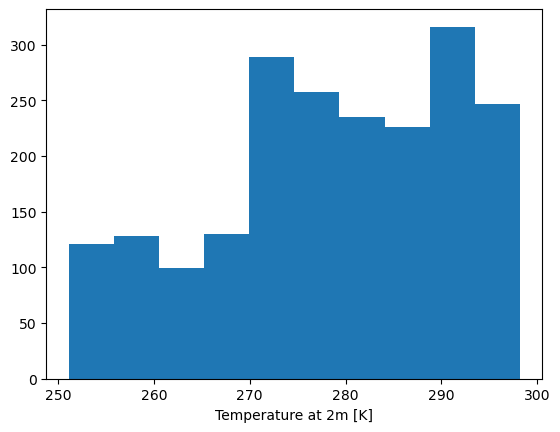

In [8]:
tas_1=data1.tas
tas_2=data2.tas
tas_1.load()
tas_1.plot()


/usr/lib/python3/dist-packages/xarray/plot/utils.py:819: CFWarning: this date/calendar/year zero convention is not supported by CF
  first = np.take(coord, [0], axis=axis) - np.take(deltas, [0], axis=axis)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:576: CFWarning: this date/calendar/year zero convention is not supported by CF
  result = cftime.date2num(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, cal

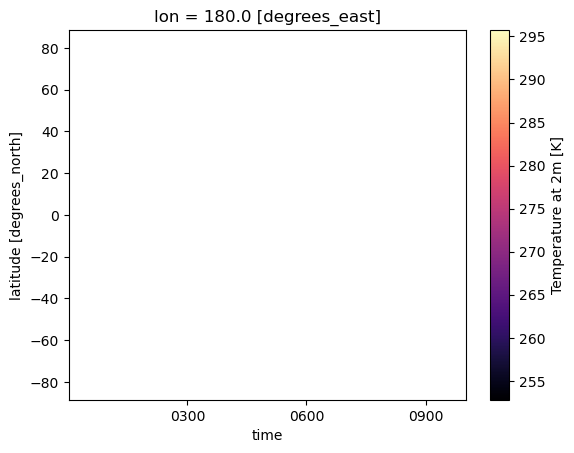

In [9]:
tas_sorted1 = tas_1.sortby('lon')
tas_sorted1.sel(lon=180).transpose().plot(cmap='magma')
plt.show()

/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


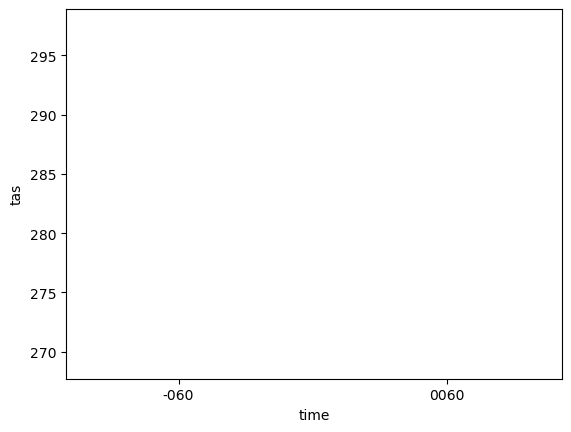

In [10]:
zonal_1_mean = Util.area_mean(tas_1).compute().plot()

In [11]:
tas1 = data1.tas
teq_1= tas1.isel(time=range(50*12, 150*12))
tas2 = data2.tas
teq_2= tas2.isel(time=range(50*12, 150*12))
teq_1

<xarray.DataArray 'tas' (time: 1200, lat: 32, lon: 64)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 0051-01-01 00:00:00 ... 0150-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Temperature at 2m
    units:             K
    code:              167
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

(array([6.83000e+02, 1.30940e+04, 4.41570e+04, 6.32510e+04, 1.29335e+05,
        4.19550e+05, 5.92558e+05, 6.85007e+05, 4.86593e+05, 2.33720e+04]),
 array([207.87756, 219.52304, 231.16853, 242.81401, 254.4595 , 266.10498,
        277.75046, 289.39594, 301.04144, 312.68692, 324.3324 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

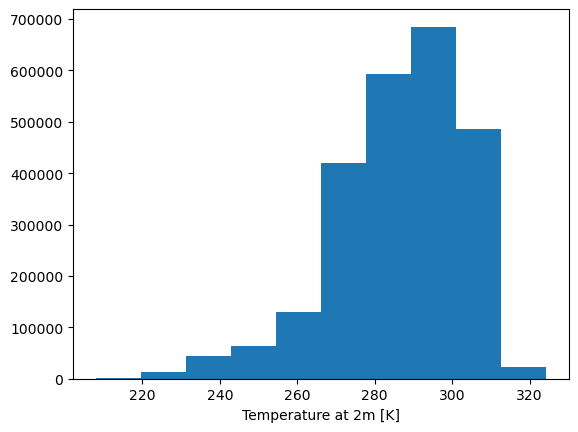

In [12]:
teq_2.load()
teq_2.plot()

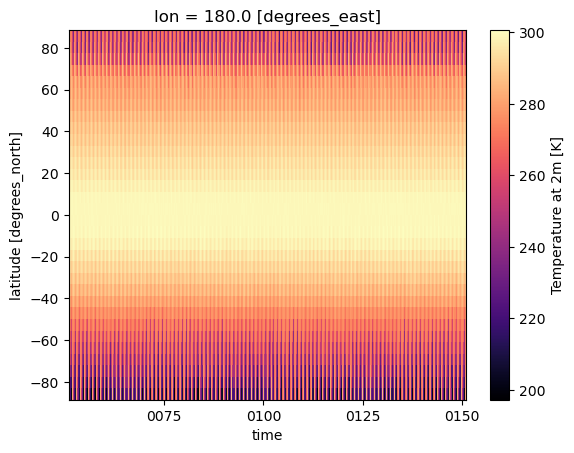

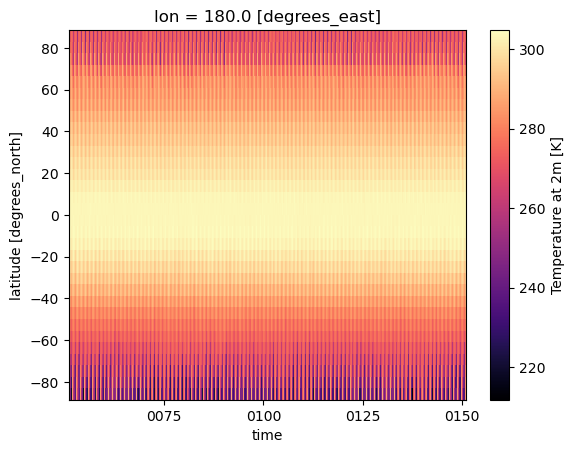

In [13]:
tas_sorted1 = teq_1.sortby('lon')
tas_sorted1.sel(lon=180).transpose().plot(cmap='magma')
plt.show()
tas_sorted2 = teq_2.sortby('lon')
tas_sorted2.sel(lon=180).transpose().plot(cmap='magma')

ZONAL MEAN

/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


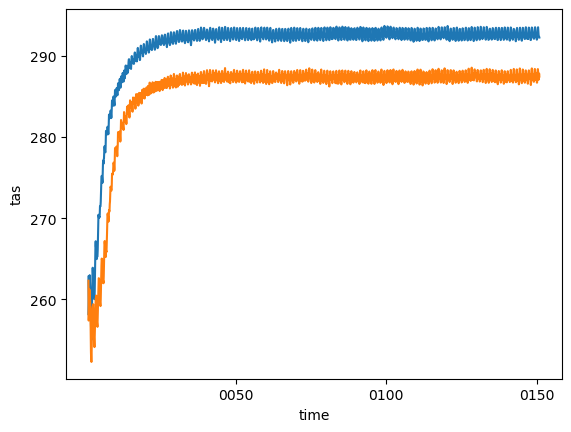

In [14]:
zonal_2_mean = Util.area_mean(tas2).compute().plot()
zonal_1_mean = Util.area_mean(tas1).compute().plot()


/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


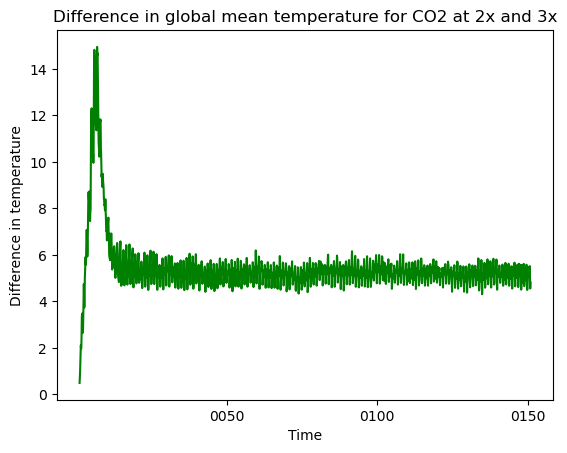

In [15]:
difference = Util.area_mean(tas2).compute() - Util.area_mean(tas1).compute()
difference.plot(color='green')

plt.title('Difference in global mean temperature for CO2 at 2x and 3x')
plt.xlabel('Time')
plt.ylabel('Difference in temperature')

plt.show()

TIME MEAN

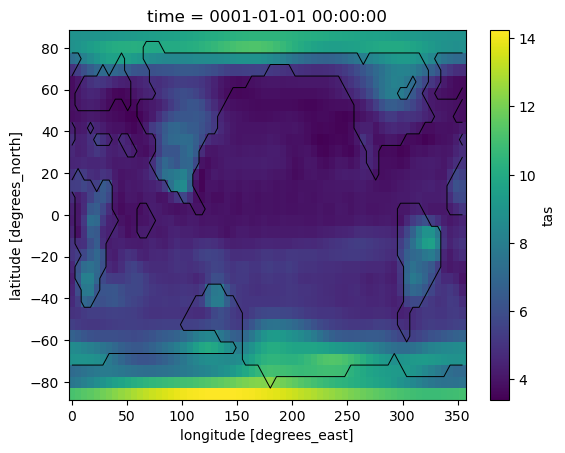

In [16]:
tas_time_mean_diff = teq_2.mean(dim='time') - teq_1.mean(dim='time')
tas_time_mean_diff.plot()
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)

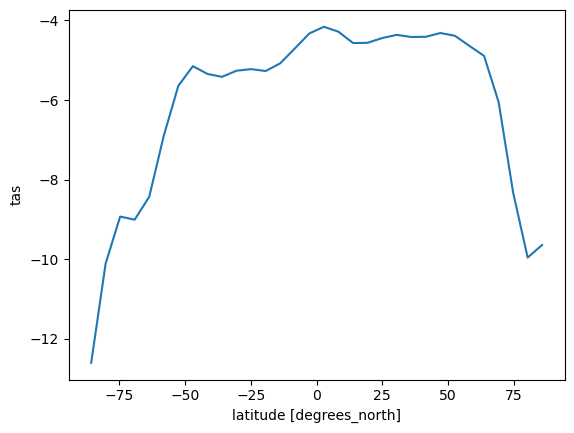

In [ ]:
tas_time_and_zonal_mean_diff = teq_1.mean(dim=('time', 'lon')) - teq_2.mean(dim=('time', 'lon')) # 2x - riferimento
tas_time_and_zonal_mean_diff.plot() # plot finale con questi singoli rispetto al 1x, ultimi 300 anni

ANNUAL MEAN

METHOD 1

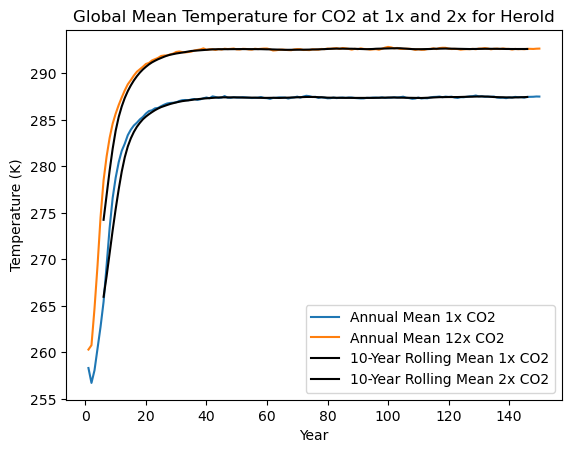

In [18]:
annual_mean1 = Util.area_mean(tas1).groupby("time.year").mean("time")
annual_mean2 = Util.area_mean(tas2).groupby("time.year").mean("time")
annual_mean1.plot(label="Annual Mean 1x CO2")
annual_mean2.plot(label="Annual Mean 12x CO2")

rolling_mean1 = annual_mean1.rolling(year=10, center=True).mean()
rolling_mean2 = annual_mean2.rolling(year=10, center=True).mean()
rolling_mean1.plot(c="k", label="10-Year Rolling Mean 1x CO2")
rolling_mean2.plot(c="k", label="10-Year Rolling Mean 2x CO2")

plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Global Mean Temperature for CO2 at 1x and 2x for Herold')
plt.legend()

plt.show() # prendi ultimi 300

METHOD 2

/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:251: CFWarning: year=0 was specified - this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:251: CFWarning: this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:209: CFWarning: this date/calendar/year zero convention is not supported by CF
  return (reference - timedelta(days=1)).day
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:255: CFWarning: this date/calendar/year zero convention is not supported by CF
  return date.replace(year=year, month=month, day=day)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:209: CFWarning: this date/calendar/year zero convention is not supported by CF
  return (reference - timedelta(days=1)).day
/usr/lib/python3/dist-packages/xarray/co

/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:251: CFWarning: year=0 was specified - this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:251: CFWarning: this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:209: CFWarning: this date/calendar/year zero convention is not supported by CF
  return (reference - timedelta(days=1)).day
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:255: CFWarning: this date/calendar/year zero convention is not supported by CF
  return date.replace(year=year, month=month, day=day)
/usr/lib/python3/dist-packages/xarray/coding/cftime_offsets.py:209: CFWarning: this date/calendar/year zero convention is not supported by CF
  return (reference - timedelta(days=1)).day
/usr/lib/python3/dist-packages/xarray/co

/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


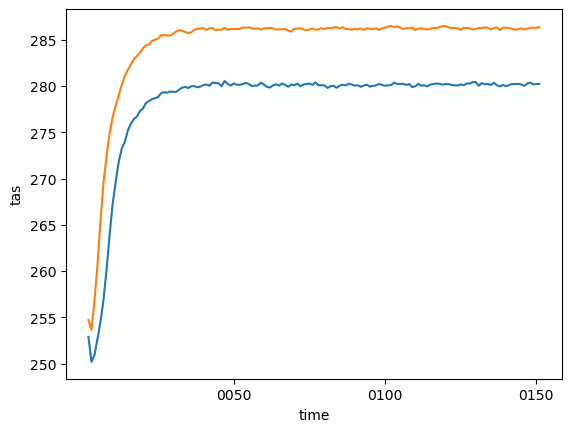

In [19]:

tas_annual_1 = tas1.resample(time='A').mean(dim='time')
tas_annual_2 = tas2.resample(time='A').mean(dim='time')
tas_time_1 = tas_annual_1.mean(dim=['lat', 'lon'])
tas_time_2 = tas_annual_2.mean(dim=['lat', 'lon'])
tas_time_1.plot()
tas_time_2.plot()

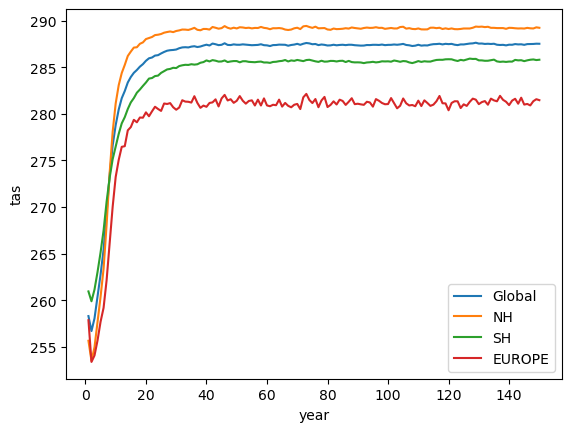

In [20]:
Util.area_mean(tas1).groupby("time.year").mean("time").plot(label="Global")
Util.area_mean(tas1.sel(lat=slice(90,0))).groupby("time.year").mean("time").plot(label="NH") # NB: from + to - for latitude, from up to down
Util.area_mean(tas1.sel(lat=slice(0,-90))).groupby("time.year").mean("time").plot(label="SH") #souther hemisphere vs northern hemisphere
Util.area_mean(tas1.sel(lat=slice(70,30), lon=slice(270,330))).groupby("time.year").mean("time").plot(label="EUROPE")
plt.legend(); # interessante farlo con tutte le simulazioni per vedere come cambia

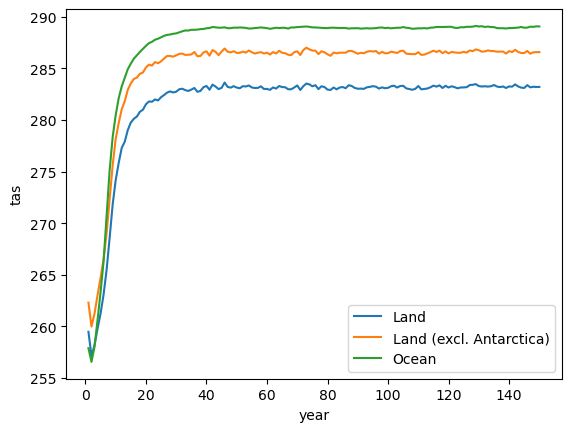

In [21]:
mask2 = data1["lsm"].isel(time=0)
Util.area_mean(tas1.where(mask2==1)).groupby("time.year").mean("time").plot(label="Land") #excluding ocean
Util.area_mean(tas1.where(mask2==1).sel(lat=slice(90,-60))).groupby("time.year").mean("time").plot(label="Land (excl. Antarctica)")
Util.area_mean(tas1.where(mask2==0)).groupby("time.year").mean("time").plot(label="Ocean")
plt.legend()

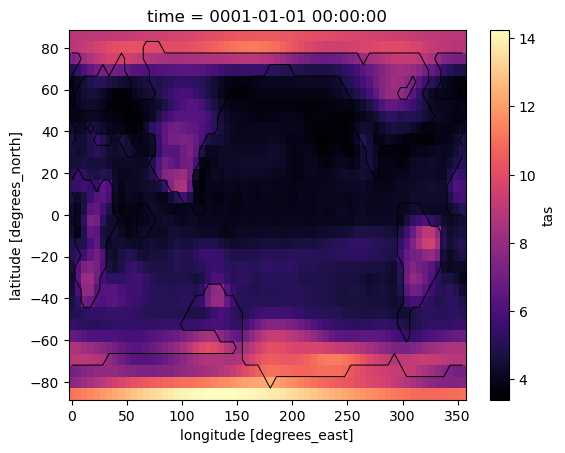

In [22]:
t1 = teq_1.mean("time") 
t2 = teq_2.mean("time")
(t2 - t1).plot(cmap='magma') # con il controllo 1x
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)

SPIN-UP AND EQUILIBRIUM

In [23]:
t2_spinup= tas2.isel(time=range(1*12, 400*12))
tas_clim_spinup = t2_spinup.mean("time") # from start year to year before the equilibrium
tas_clim_equilibrated = t2 # example for year in which it reaches the equilibrium (10: see below gm)
(tas_clim_equilibrated-273.15).plot()  # showing Celsius degrees on the y axis
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)
plt.show()
t2_spinup.plot()
(tas_clim_equilibrated-tas_clim_spinup).plot()
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)

IndexError: index 1800 is out of bounds for axis 0 with size 1800

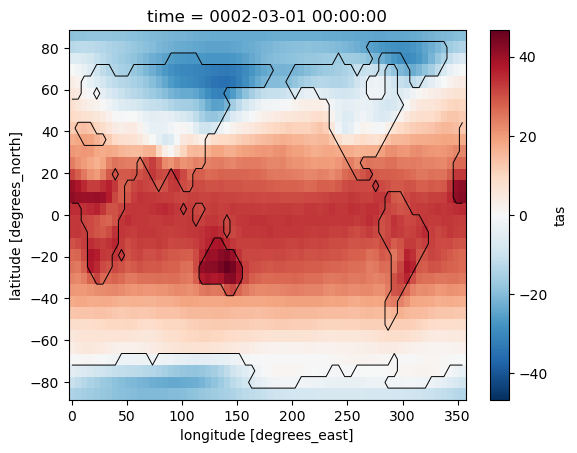

In [22]:
(teq_2.groupby("time.season")["DJF"].mean("time")-273.15).plot() # grouping for winter 
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)

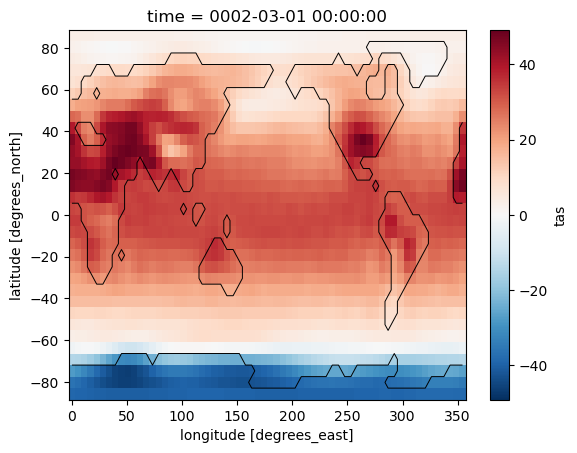

In [23]:
(teq_2.groupby("time.month")[7].mean("time")-273.15).plot() # what happens in summer (july), averaged from year of equilibrium
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)

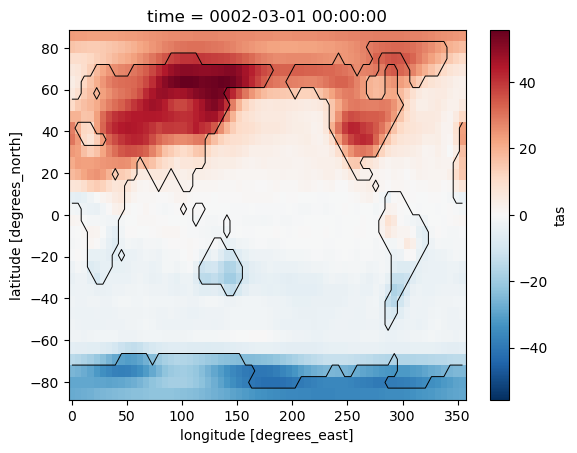

In [24]:
tas_new= tas2.groupby('time.month').mean(dim='time')
(tas_new[6] - tas_new[0]).plot()
plt.title('June minus July SST Climatology')
data2["lsm"].isel(time=0).plot.contour(levels=[0.5], colors="black", linewidths=0.7)


2D MAPS

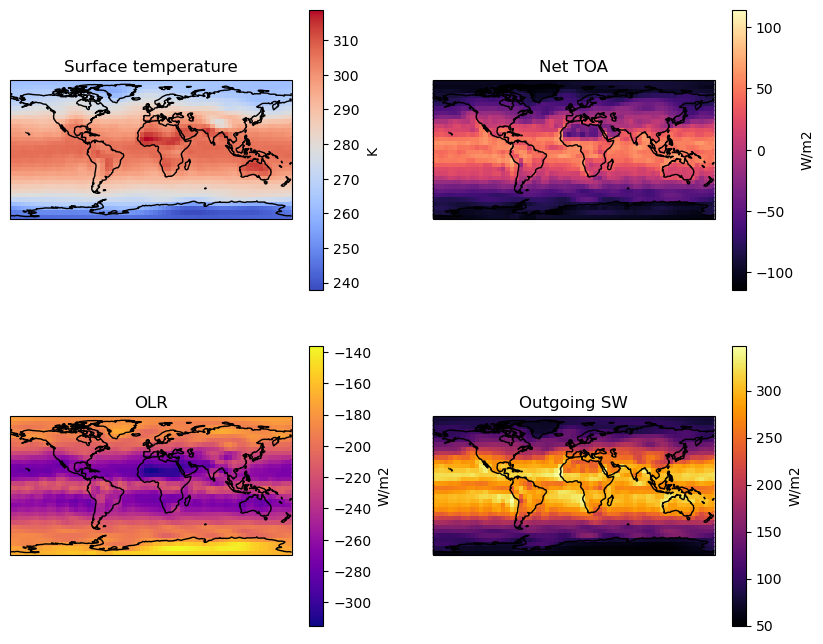

In [25]:
dataeq = data2.isel(time=slice(1*12, 600*12)).mean(dim='time')

title = "Surface temperature"
fig, _ = Util.plot_map_2D(dataeq['tas'], title=title, units="K", nx=2, ny=2, nn=1, cmap='coolwarm')
title = "Net TOA" # top of the atmosphere net radiation
net = dataeq.rlut + dataeq.rst # rlut = outgoing longwave radiation + shortwave radiation
fig, _ = Util.plot_map_2D(net,  title=title, units="W/m2", nx=2, ny=2, nn=2, cmap='magma', fig=fig)
title = "OLR" # outgoing long radiation
fig, _ = Util.plot_map_2D(dataeq.rlut, units="W/m2", title=title, nx=2, ny=2, nn=3, fig=fig, cmap='plasma')
title = "Outgoing SW" # shortwave radiation
fig, _ = Util.plot_map_2D(dataeq.rst,  units="W/m2", title=title, nx=2, ny=2, nn=4, fig=fig, cmap='inferno')